In [ ]:
# Imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='/content/drive/MyDrive/ECE 539 Project/Data/diamonds.csv'

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


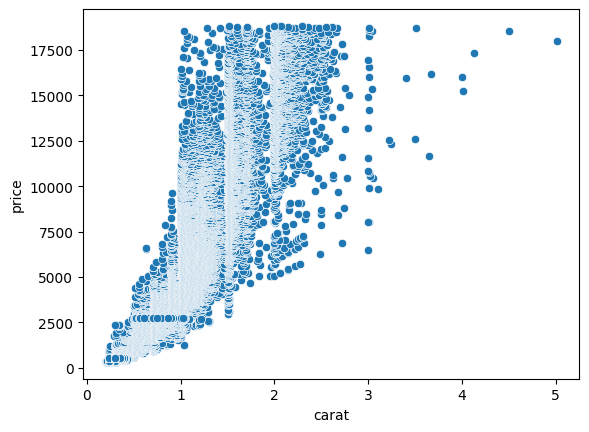

In [ ]:
"""
Data pre-formatting

"""

# Test load for csv with pandas
diamonds_dataset = pd.read_csv(path)

# Drop "Unnames: 0" column from the dataset
diamonds_dataset = diamonds_dataset.drop(["Unnamed: 0"], axis=1);

# Drop diamonds where any dimension is equal to 0
diamonds_dataset = diamonds_dataset.drop(diamonds_dataset[diamonds_dataset.x == 0].index)
diamonds_dataset = diamonds_dataset.drop(diamonds_dataset[diamonds_dataset.y == 0].index)
diamonds_dataset = diamonds_dataset.drop(diamonds_dataset[diamonds_dataset.z == 0].index)

# Drop missing values for each numeric property
diamonds_dataset.dropna(subset=['table'], inplace=True)
diamonds_dataset.dropna(subset=['depth'], inplace=True)
diamonds_dataset.dropna(subset=['carat'], inplace=True)
diamonds_dataset.dropna(subset=['price'], inplace=True)

# Drop duplicate values
diamonds_dataset = diamonds_dataset.drop_duplicates()

pure_dataset = diamonds_dataset

# Perform one-hot encoding on non-numeric labels
diamonds_dataset = pd.get_dummies(diamonds_dataset, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'])

# Normalize X Y Z mesurements

sns.scatterplot(data=diamonds_dataset, x="carat", y="price")

diamonds_dataset

In [ ]:
"""
Perform z-score normalization on carat values
"""

# Get Z score data
z_scores = np.abs(stats.zscore(diamonds_dataset))

# Define a threshold for identifying outliers
threshold = 3

# Identify and handle outliers
outliers = (z_scores > threshold).any(axis=1)
diamonds_dataset = diamonds_dataset[~outliers]

diamonds_dataset

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
7,0.26,61.9,55.0,337,4.07,4.11,2.53,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0.23,59.4,61.0,338,4.00,4.05,2.39,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53934,0.72,62.7,59.0,2757,5.69,5.73,3.58,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Plot carat vs price for reference
sns.scatterplot(data=diamonds_dataset, x="carat", y="price")

In [ ]:
"""
Perform train/test split
"""

# Partition data into priced/non priced
x = diamonds_dataset.drop("price", axis=1).values
y = diamonds_dataset["price"].values

# Partition data into 60/40 train/test ratio
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)

In [ ]:
"""
Train XGBoost regression model on partitioned data
"""

# Drop columns?
pure_dataset
pure_dataset.drop(columns=['cut', 'color', 'clarity'], inplace=True)
p_x = diamonds_dataset.drop("price", axis=1).values
p_y = diamonds_dataset["price"].values
p_x_train, p_x_test, p_y_train, p_y_test = train_test_split(p_x,p_y, test_size=0.33, random_state=0)

# Init XGBoost model
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.8,
    max_depth=10,       # Maximum depth of each tree
    random_state=42
)


# Fit to training and test data
xgb_regressor.fit(p_x_train, p_y_train)
pure_dataset

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
"""
Test XGBoost regression against test data
"""
p_y_pred = xgb_regressor.predict(p_x_test)

xgb_mse = mean_squared_error(p_y_test, p_y_pred)
xgb_mae = mean_absolute_error(p_y_test, p_y_pred)
xgb_rmse = np.sqrt(xgb_mse)

MAE: 293.97644489637355
RMSE: 534.8771757635687
MSE: 286093.5931528116


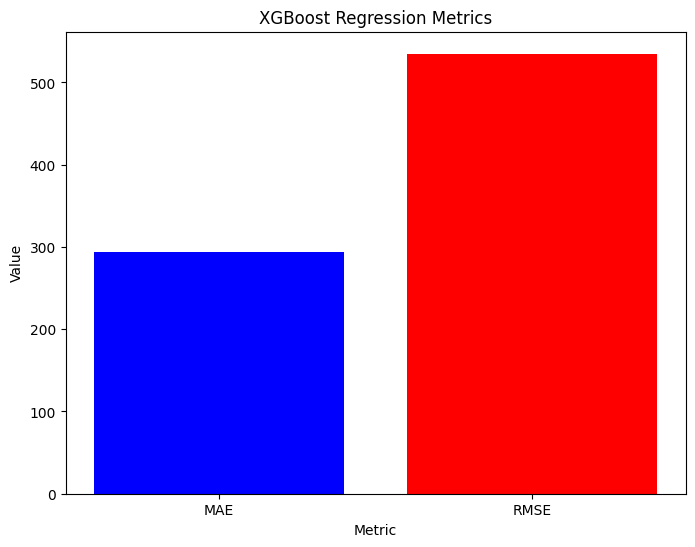

In [ ]:
"""
Print and plot performance statistics
"""
# Create a bar plot for MAE and MSE
metrics = ['MAE', 'RMSE']
values = [xgb_mae, xgb_rmse]

print("MAE: " + str(xgb_mae))
print("RMSE: " + str(xgb_rmse))
print("MSE: " + str(xgb_mse))

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'red'])
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('XGBoost Regression Metrics')
plt.show()

In [ ]:
"""
Train decision tree classifier on data
"""

# Initialize DecisionTreeRegressor object
decision_tree = DecisionTreeRegressor(max_depth=None, random_state=50)

# Train the model on the training data
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=50)

In [ ]:
"""
Test dec tree accuracy
"""

dec_tree_y_pred = decision_tree.predict(x_test)

dec_tree_mse = mean_squared_error(y_test, dec_tree_y_pred)
dec_tree_mae = mean_absolute_error(y_test, dec_tree_y_pred)

dec_tree_mae

average_price = diamonds_dataset['price'].mean()
average_price

3715.223074879726

In [ ]:
"""
Example of regression stacking
"""
# Split the data into training and testing sets
x_train_stack, x_test_stack, y_train_stack, y_test_stack = train_test_split(p_x, p_y, test_size=0.2, random_state=42)

# Define the base models
base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('xgboost', XGBRegressor(random_state=42))
]

# Define the meta-model (linear regression as the final estimator)
meta_model = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Fit the stacking regressor on the training data
stacking_regressor.fit(x_train_stack, y_train_stack)

# Make predictions using the stacked model
y_pred_stacked = stacking_regressor.predict(x_test_stack)

# Evaluate the stacked model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_stack, y_pred_stacked)
r2 = r2_score(y_test_stack, y_pred_stacked)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 211571.16349321697
R-squared (R2): 0.9817023413265966


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy import stats

def preprocess_diamonds_data(raw_data, apply_encoding=True, use_one_hot=True, standard_scale_xyz=True, z_score_normalize=True):
    """
    Preprocesses the diamonds dataset with options for encoding, standard scaling, and z-score normalization.

    Parameters:
    - raw_data (pd.DataFrame): The raw DataFrame to preprocess.
    - apply_encoding (bool): If True, applies encoding to categorical data (either one-hot or ordinal). Defaults to True.
    - use_one_hot (bool): Determines the type of encoding; if True, applies one-hot encoding, otherwise applies ordinal encoding. Ignored if apply_encoding is False. Defaults to True.
    - standard_scale_xyz (bool): If True, applies standard scaling to 'x', 'y', 'z' columns. Defaults to True.
    - z_score_normalize (bool): If True, applies z-score normalization and removes outliers. Defaults to True.

    Returns:
    - pd.DataFrame: The preprocessed DataFrame.
    """

    data = raw_data.copy()

    # Basic preprocessing
    if "Unnamed: 0" in data.columns:
        data = data.drop(["Unnamed: 0"], axis=1)
    data = data[(data.x != 0) & (data.y != 0) & (data.z != 0)]
    data.dropna(subset=['table', 'depth', 'carat', 'price'], inplace=True)
    data.drop_duplicates(inplace=True)

    # Encoding categorical data
    if apply_encoding:
        if use_one_hot:
            data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'], prefix=['cut', 'color', 'clarity'])
        else:
            for column, order in [('clarity', ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'][::-1]),
                                  ('cut', ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'][::-1]),
                                  ('color', sorted(raw_data['color'].unique())[::-1])]:
                mapping = {category: i for i, category in enumerate(order)}
                data[column] = data[column].map(mapping)
                print(f"Decode key for {column}: {mapping}")
    # Standard scaling for 'x', 'y', 'z'
    if standard_scale_xyz:
        standard_scalar = StandardScaler()
        data[['x', 'y', 'z']] = standard_scalar.fit_transform(data[['x', 'y', 'z']])

    # Z-score normalization and outlier removal
    if z_score_normalize:
        z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
        threshold = 3
        data = data[(z_scores < threshold).all(axis=1)]

    return data

# XGBoost for Ordinal Data Only

In [ ]:
rawDataDf = pd.read_csv("/content/drive/MyDrive/ECE 539 Project/Data/diamonds.csv")
clean_data_ord = preprocess_diamonds_data(rawDataDf, use_one_hot=False)
clean_data_cat = preprocess_diamonds_data(rawDataDf, use_one_hot=True)
clean_data_ord = clean_data_ord.drop(['table', 'depth', 'carat', 'x', 'y', 'z'], axis = 1)
clean_data_cat = clean_data_cat.drop(['table', 'depth', 'carat', 'x', 'y', 'z'], axis = 1)

Decode key for clarity: {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
Decode key for cut: {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
Decode key for color: {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}


In [ ]:
from sklearn.model_selection import cross_val_score
x = clean_data_ord.drop("price", axis=1).values
y = clean_data_ord["price"].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)
"""
Train XGBoost regression model on partitioned data
"""
# Init XGBoost model
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.8,
    max_depth=10,       # Maximum depth of each tree
    random_state=42
)
xgb_regressor.fit(x_train, y_train)
"""
Test XGBoost regression against test data
"""
y_pred = xgb_regressor.predict(x_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

cross_val_score(xgb_regressor, x_train, y_train, scoring='r2', cv=5).mean()



0.06446465672148356

In [ ]:
x = clean_data_cat.drop("price", axis=1).values
y = clean_data_cat["price"].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=0)
"""
Train XGBoost regression model on partitioned data
"""
# Init XGBoost model
xgb_regressor = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Number of boosting rounds (trees)
    learning_rate=0.8,
    max_depth=10,       # Maximum depth of each tree
    random_state=42
)
xgb_regressor.fit(x_train, y_train)
"""
Test XGBoost regression against test data
"""
y_pred = xgb_regressor.predict(x_test)
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_rmse = np.sqrt(xgb_mse)

cross_val_score(xgb_regressor, x_train, y_train, scoring='r2', cv=5).mean()

0.06082051004407511

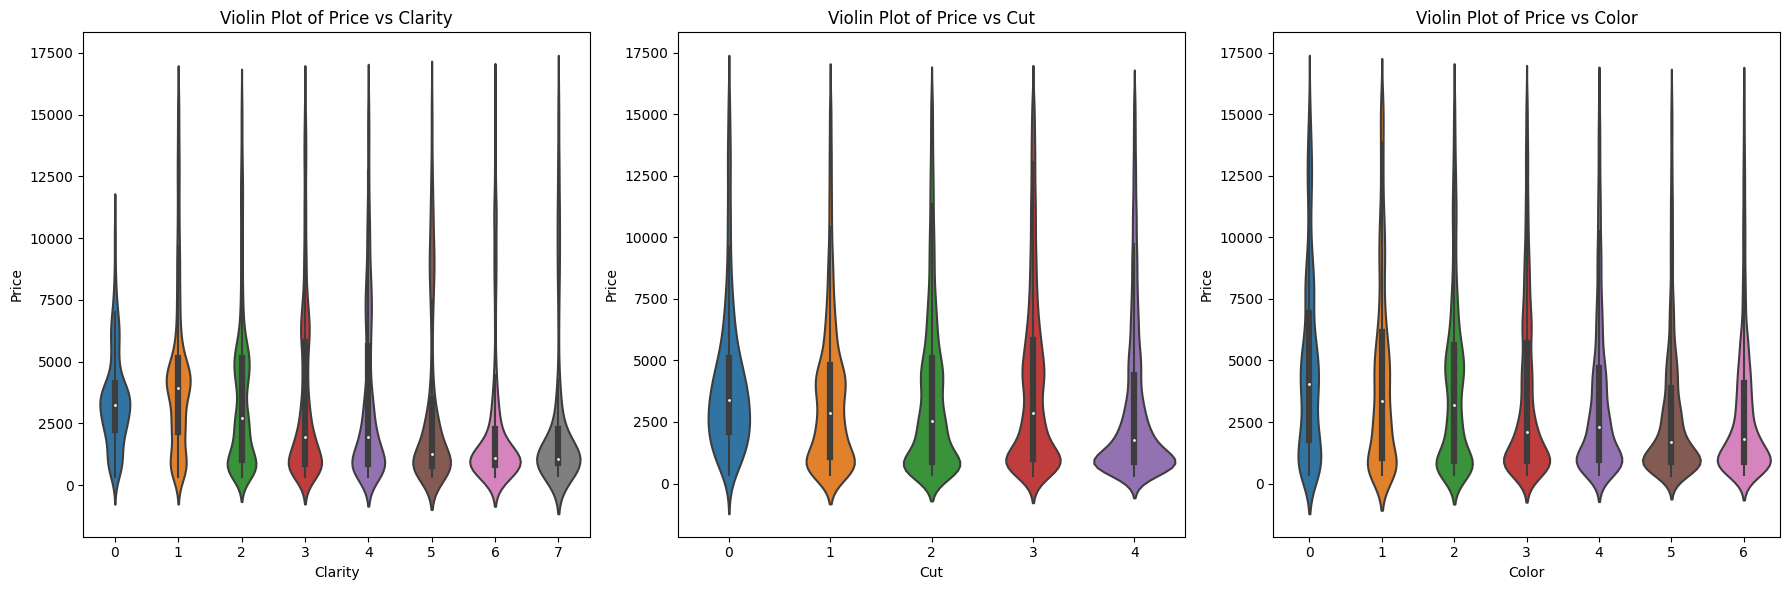

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# Create a violin plot for 'clarity' vs 'price'
sns.violinplot(x='clarity', y='price', data=clean_data_ord, ax=axes[0])
axes[0].set_title('Violin Plot of Price vs Clarity')
axes[0].set_xlabel('Clarity')
axes[0].set_ylabel('Price')

# Create a violin plot for 'cut' vs 'price'
sns.violinplot(x='cut', y='price', data=clean_data_ord, ax=axes[1])
axes[1].set_title('Violin Plot of Price vs Cut')
axes[1].set_xlabel('Cut')
axes[1].set_ylabel('Price')

# Create a violin plot for 'color' vs 'price'
sns.violinplot(x='color', y='price', data=clean_data_ord, ax=axes[2])
axes[2].set_title('Violin Plot of Price vs Color')
axes[2].set_xlabel('Color')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()


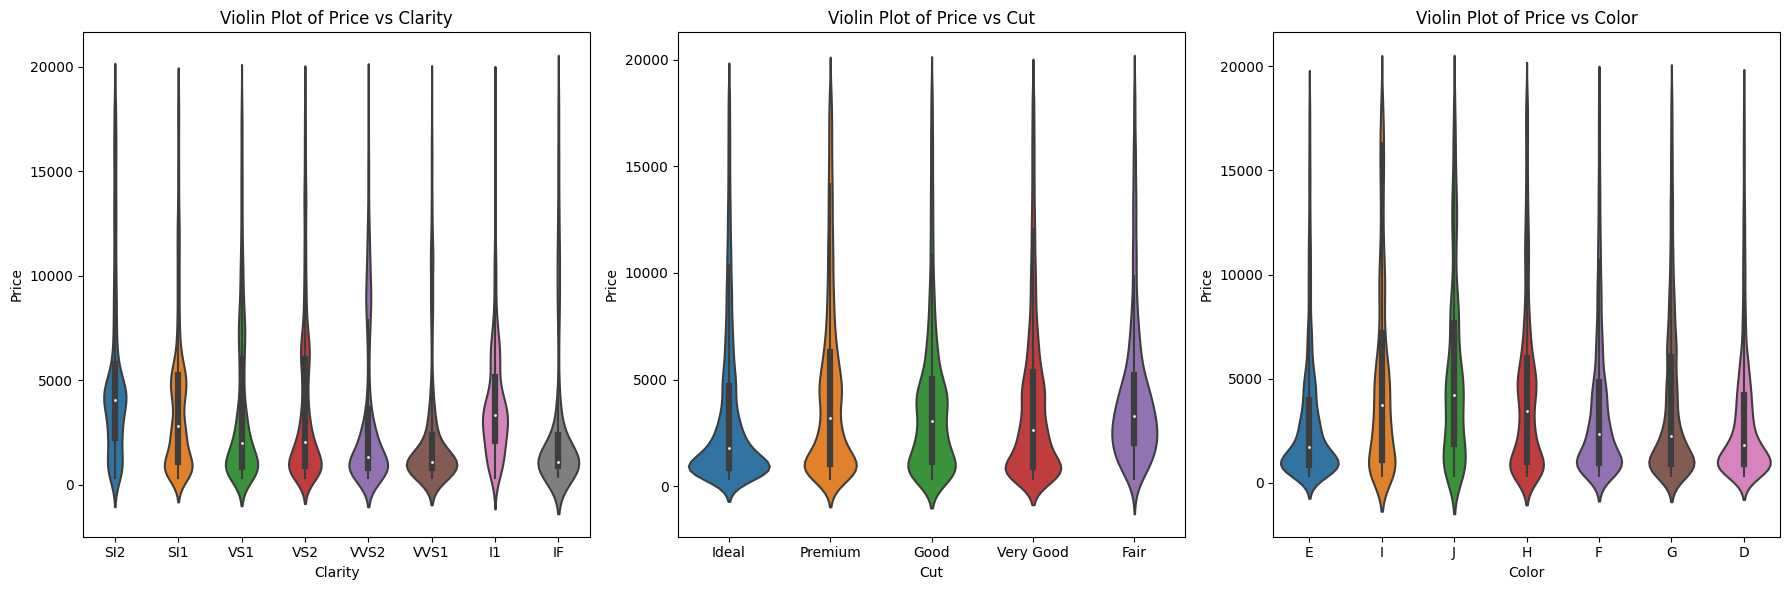

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))

# Create a violin plot for 'clarity' vs 'price'
sns.violinplot(x='clarity', y='price', data=rawDataDf, ax=axes[0])
axes[0].set_title('Violin Plot of Price vs Clarity')
axes[0].set_xlabel('Clarity')
axes[0].set_ylabel('Price')

# Create a violin plot for 'cut' vs 'price'
sns.violinplot(x='cut', y='price', data=rawDataDf, ax=axes[1])
axes[1].set_title('Violin Plot of Price vs Cut')
axes[1].set_xlabel('Cut')
axes[1].set_ylabel('Price')

# Create a violin plot for 'color' vs 'price'
sns.violinplot(x='color', y='price', data=rawDataDf, ax=axes[2])
axes[2].set_title('Violin Plot of Price vs Color')
axes[2].set_xlabel('Color')
axes[2].set_ylabel('Price')

plt.tight_layout()
plt.show()


In [40]:
8*5*7

280